In [64]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import scipy.stats 
from scipy.stats import norm, beta, bernoulli
import pylab

In [2]:
import sys
sys.path.append("C:/Users/clementine.rosier/OneDrive - Ekimetrics/Documents/GitHub/dynamic_pricing")

%load_ext autoreload
%autoreload 2

In [3]:
#simple simulations
from src.simulations import SimpleSimulation
from src.simulation_melange_gaussien import GMixSimulation
from src.simulation_uniforme import UniformSimulation
#simulations with context
from src.context_generator import ContextGenerator
from src.simulation_with_context import ContextualDemandSimulation
#bandit algo
from src.binomial_bandit import BinomialBandit
from src.simple_bandit_greedy import GreedyBandit
from src.simple_bandit_ucb import UCBBandit
from src.context_bandit import ContextBandit
#evaluation algo (regret)
from src.evaluate_model import EvaluateBandit
from src.evaluate_with_context import EvaluateBanditContext

In [4]:
def plot_demand(simulation, min_price = 0, max_price = 150, n_points = 50, n_estimates_per_point = 40) : 
    prices = []
    revenues = []
    for price in np.linspace(min_price, max_price, n_points) : 
        revenues.extend( [int(simulation.evaluate(price)) * price for x in range(n_estimates_per_point)] )
        prices.extend([price for x in range(n_estimates_per_point)])
    
    a = np.array([prices, revenues])

    fig = plt.figure(figsize = (15,6), facecolor="w")
    ax = sns.lineplot(a[0], a[1])
    ax.legend("")

In [5]:
def test_bandit_thompson(simulation,k_p, alpha_0, beta_0,init_round=10,test_round=5000):
    hist = []
    regret = []
    reward_T = []
    parameters=np.array([np.array([alpha_0]),np.array([beta_0])])
    bandit = BinomialBandit(k_p, alpha_0, beta_0)
    evaluation=EvaluateBandit(bandit,simulation)
    print(evaluation.best_price)
    # Exploration round
    for i in range(init_round):
        for j in range(bandit.k):
            bandit.chose_action(force_action=j)
            price = k_p[bandit.action]
            reward = int(simulation.evaluate(price)) * price
            bandit.update(bandit.action, reward)
            regret.append(evaluation.get_regret(bandit.n_obs))
            parameters = np.append(parameters,np.array([np.array([bandit.alpha_n]),np.array([bandit.beta_n])]),axis=1)

    for i in range(test_round):
        bandit.chose_action(method="thompson")
        price = k_p[bandit.action]
        reward = int(simulation.evaluate(price)) * price
        bandit.update(bandit.action, reward)
        regret.append(evaluation.get_regret(bandit.n_obs))
        hist.append(k_p[bandit.action])
        parameters = np.append(parameters,np.array([np.array([bandit.alpha_n]),np.array([bandit.beta_n])]),axis=1)
    return hist,regret,parameters

In [6]:
def test_bandit_greedy(simulation,k_p,c,d,init_round=10,test_round=5000):
    hist = []
    regret = []
    reward_T = []
    bandit = GreedyBandit(k_p, d,c)
    evaluation=EvaluateBandit(bandit,simulation)
    # Exploration round
    for i in range(init_round):
        for j in range(bandit.k):
            bandit.chose_action(force_action=j)
            price = k_p[bandit.action]
            reward = int(simulation.evaluate(price)) * price
            regret.append(evaluation.get_regret(bandit.n_obs))
            bandit.update(bandit.action, reward)

    for i in range(test_round):
        bandit.chose_action(method="greedy")
        price = k_p[bandit.action]
        reward = int(simulation.evaluate(price)) * price
        regret.append(evaluation.get_regret(bandit.n_obs))
        bandit.update(bandit.action, reward)
        hist.append(k_p[bandit.action])
        
    return hist,regret

In [65]:
def test_bandit_ucb(simulation,k_p,init_round=10,test_round=5000):
    hist = []
    regret = []
    reward_T = []
    B_stocked=[]
    bandit = UCBBandit(k_p)
    evaluation=EvaluateBandit(bandit,simulation)
    # Exploration round
    for i in range(init_round):
        for j in range(bandit.k):
            bandit.chose_action(force_action=j)
            price = k_p[bandit.action]
            reward = int(simulation.evaluate(price)) * price
            regret.append(evaluation.get_regret(bandit.n_obs))
            bandit.update(bandit.action, reward)
            

    for i in range(test_round):
        bandit.chose_action(method="ucb")
        price = k_p[bandit.action]
        B_stocked.append(bandit.B)
        reward = int(simulation.evaluate(price)) * price
        bandit.update(bandit.action, reward)
        regret.append(evaluation.get_regret(bandit.n_obs))
        hist.append(k_p[bandit.action])
        
    return hist,regret,B_stocked

# Simulations

In [8]:
sim_u = UniformSimulation(35,75)
sim_u.optimal_price

37.499969482421875

In [38]:
size = 7
k_p = np.linspace(5,120,size)
nb_round=1000
nb_test=1000

In [39]:
alpha_0 = np.repeat(1,size)
beta_0 = np.repeat(1,size)

In [40]:
regret_1=[]
price_1=[]
regret_1_v=[]
price_1_v=[]
for i in range(nb_test):
    bandit_th=test_bandit_thompson(sim_u,k_p,alpha_0,beta_0,0,nb_round)
    price_1.append(bandit_th[0][nb_round-1])
    regret_1.append(bandit_th[1][nb_round-1])
    price_1_v.append(bandit_th[0][500])
    regret_1_v.append(bandit_th[1][500])

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.3333333

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

In [50]:
alpha_0 = np.repeat(5,size)
beta_0 = np.repeat(5,size)
regret_5=[]
price_5=[]
regret_5_v=[]
price_5_v=[]
for i in range(nb_test):
    bandit_th=test_bandit_thompson(sim_u,k_p,alpha_0,beta_0,0,nb_round)
    price_5.append(bandit_th[0][nb_round-1])
    regret_5.append(bandit_th[1][nb_round-1])
    price_5_v.append(bandit_th[0][500])
    regret_5_v.append(bandit_th[1][500])

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

In [66]:
alpha_0 = np.repeat(0.25,size)
beta_0 = np.repeat(0.25,size)
regret_0=[]
price_0=[]
regret_0_v=[]
price_0_v=[]
for i in range(nb_test):
    bandit_th=test_bandit_thompson(sim_u,k_p,alpha_0,beta_0,0,nb_round)
    price_0.append(bandit_th[0][nb_round-1])
    regret_0.append(bandit_th[1][nb_round-1])
    price_0_v.append(bandit_th[0][500])
    regret_0_v.append(bandit_th[1][500])

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBandit model instanciated with 7 arms.
43.333333333333336
BinomialBa

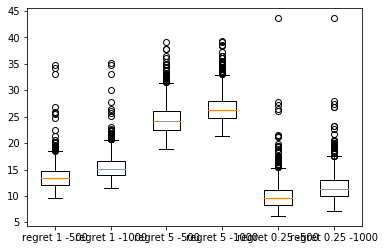

In [67]:
BoxName = ['regret 1 -500','regret 1 -1000','regret 5 -500','regret 5 -1000','regret 0.25 -500','regret 0.25 -1000']

data = [regret_1_v,regret_1,regret_5_v,regret_5,regret_0_v,regret_0]

plt.boxplot(data)

#plt.ylim(0,30)

pylab.xticks([1,2,3,4,5,6], BoxName)

#plt.savefig('MultipleBoxPlot02.png')
plt.show()

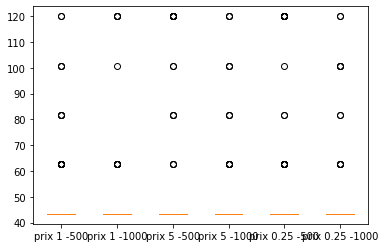

In [72]:
BoxName = ['prix 1 -500','prix 1 -1000','prix 5 -500','prix 5 -1000','prix 0.25 -500','prix 0.25 -1000']

data = [price_1_v,price_1,price_5_v,price_5,price_0_v,price_0]

plt.boxplot(data)

#plt.ylim(0,60)

pylab.xticks([1,2,3,4,5,6], BoxName)

#plt.savefig('MultipleBoxPlot02.png')
plt.show()

In [73]:
regret_3=[]
price_3=[]
regret_3_v=[]
price_3_v=[]
for i in range(nb_test):
    bandit_g=test_bandit_greedy(sim_u,k_p,5,3,0,nb_round)
    price_3.append(bandit_g[0][nb_round-1])
    regret_3.append(bandit_g[1][nb_round-1])
    price_3_v.append(bandit_g[0][500])
    regret_3_v.append(bandit_g[1][500])

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.


C:/Users/clementine.rosier/OneDrive - Ekimetrics/Documents/GitHub/dynamic_pricing\src\simple_bandit_greedy.py:65: RuntimeWarning: invalid value encountered in true_divide
  average_reward = self.k_p*np.nan_to_num(self.n_pos/(self.n_obs))


BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

In [74]:
regret_7=[]
price_7=[]
regret_7_v=[]
price_7_v=[]
for i in range(nb_test):
    bandit_g=test_bandit_greedy(sim_u,k_p,5,7,0,nb_round)
    price_7.append(bandit_g[0][nb_round-1])
    regret_7.append(bandit_g[1][nb_round-1])
    price_7_v.append(bandit_g[0][500])
    regret_7_v.append(bandit_g[1][500])

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

In [75]:
regret_15=[]
price_15=[]
regret_15_v=[]
price_15_v=[]
for i in range(nb_test):
    bandit_g=test_bandit_greedy(sim_u,k_p,5,15,0,nb_round)
    price_15.append(bandit_g[0][nb_round-1])
    regret_15.append(bandit_g[1][nb_round-1])
    price_15_v.append(bandit_g[0][500])
    regret_15_v.append(bandit_g[1][500])

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBandit model for espilon-greedy instanciated with 7 arms.
BinomialBa

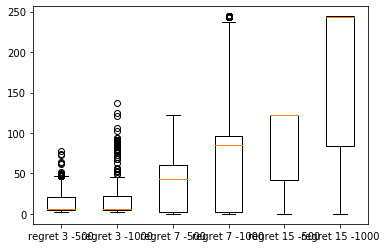

In [76]:
BoxName = ['regret 3 -500','regret 3 -1000','regret 7 -500','regret 7 -1000','regret 15 -500','regret 15 -1000']

data = [regret_3_v,regret_3,regret_7_v,regret_7,regret_15_v,regret_15]

plt.boxplot(data)

#plt.ylim(0,30)

pylab.xticks([1,2,3,4,5,6], BoxName)

#plt.savefig('MultipleBoxPlot02.png')
plt.show()

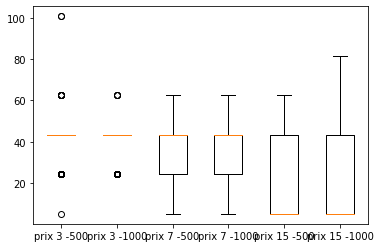

In [77]:
BoxName = ['prix 3 -500','prix 3 -1000','prix 7 -500','prix 7 -1000','prix 15 -500','prix 15 -1000']

data = [price_3_v,price_3,price_7_v,price_7,price_15_v,price_15]

plt.boxplot(data)

#plt.ylim(0,30)

pylab.xticks([1,2,3,4,5,6], BoxName)

#plt.savefig('MultipleBoxPlot02.png')
plt.show()

In [105]:
data = pd.DataFrame(list(zip(price_3_v,price_3,price_7_v,price_7,price_15_v,price_15)),columns=['prix 3 -500','prix 3 -1000','prix 7 -500','prix 7 -1000','prix 15 -500','prix 15 -1000'])
data.head()

,prix 3 -500,prix 3 -1000,prix 7 -500,prix 7 -1000,prix 15 -500,prix 15 -1000
0,43.333333,43.333333,5.000000,43.333333,5.0,5.0
1,24.166667,24.166667,5.000000,24.166667,62.5,62.5
2,43.333333,43.333333,24.166667,24.166667,5.0,5.0
3,43.333333,43.333333,24.166667,24.166667,5.0,5.0
4,43.333333,43.333333,43.333333,43.333333,5.0,5.0


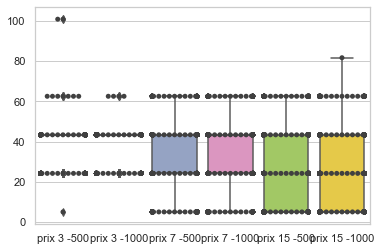

In [110]:
ax = sns.boxplot(data=data, palette="Set2")
ax = sns.swarmplot(data=data, color=".25")

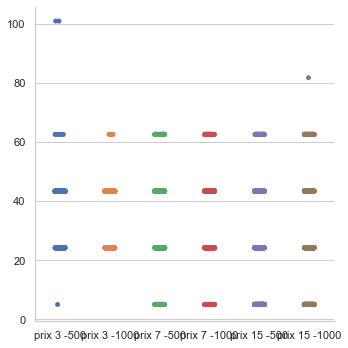

In [113]:
g=sns.catplot(data=data)